# 1. Поднимем pip и установим все зависимости

In [1]:
# в Colab используйте магию %pip для установки в правильное окружение
# 1) Сборка последней версии transformers из исходников:
!pip install --upgrade pip
!pip install git+https://github.com/huggingface/transformers accelerate
# 2) Утилиты для VL:
!pip install qwen-vl-utils[decord]==0.0.8

# Install missing dependency
!pip install gekko

# 3) Наш пакет и зависимости:
%cd /content
!git clone https://github.com/Mike030668/ranger_generation.git
!pip install -e . \
    --no-deps \
    transformers sentencepiece auto-gptq peft accelerate huggingface-hub \
    diffusers safetensors tqdm pillow qwen-vl-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-fmrsgjus
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-fmrsgjus
  Resolved https://github.com/huggingface/transformers to commit 4b47b2b8ea9252e36669397243b770505f953d69
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 158.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 168.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.0 MB/s eta 0:00:00
   ━━

Тестовые челоыечески промпты

- «Сберкот анфас в тёплом золотом свете на закате»
- «Портрет девушки анфас в киновизуальном стиле на фоне городского пейзажа»
- «Кошка-астронавт крупным планом при мягком золотом освещении»
- “A front-view portrait of a vintage car in cinematic color grading during golden hour”
- “Sbercat mascot standing center frame under backlit warm sunlight, photorealistic style”

# Flux

In [3]:
# в Colab-ячейке
!pip install huggingface_hub --quiet
!huggingface-cli login --token put_your_token_here


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
The token `Colab reaad` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `Colab reaad`


/content/ranger_generation
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ranger_generation (pyproject.toml) ... done
2025-07-11 07:19:03.360886: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 07:19:03.378172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752218343.399683    6013 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:175221

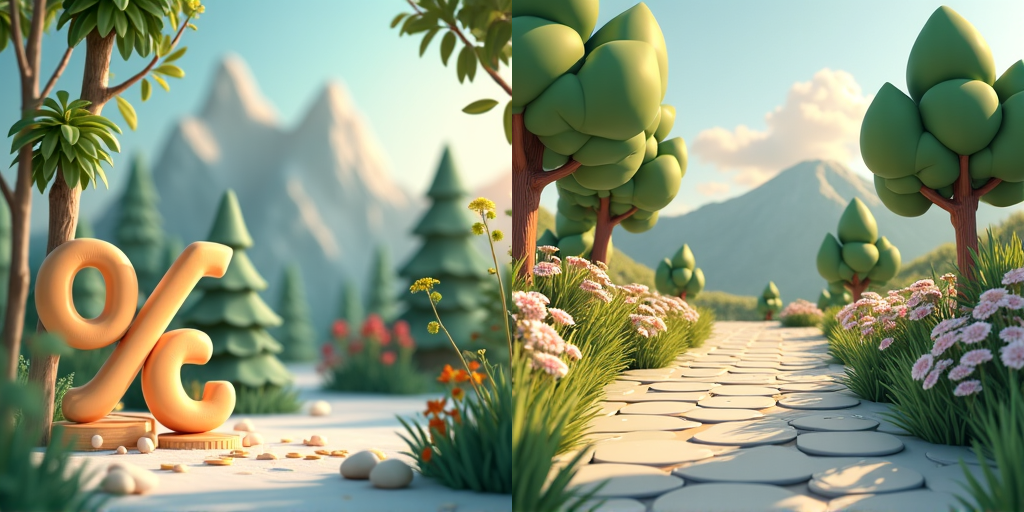

In [5]:
%cd /content//ranger_generation
!pip install -e . --quiet

prompt = "реклама сбер карты с процентом по депозиту в 3D стиле на фоне природы"
output_path = "./test_gen/out_demo_flux.png"

!python3 scripts/demo_flux.py "{prompt}" -n 2 -W 512 -H 512 -s 30 -g 7.5 --seeds 222,333 -o "{output_path}"

from IPython.display import Image, display
display(Image(output_path))


## use_qwen

/content/ranger_generation
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ranger_generation (pyproject.toml) ... done
2025-07-11 07:21:42.244804: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 07:21:42.262088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752218502.284026    6809 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:175221

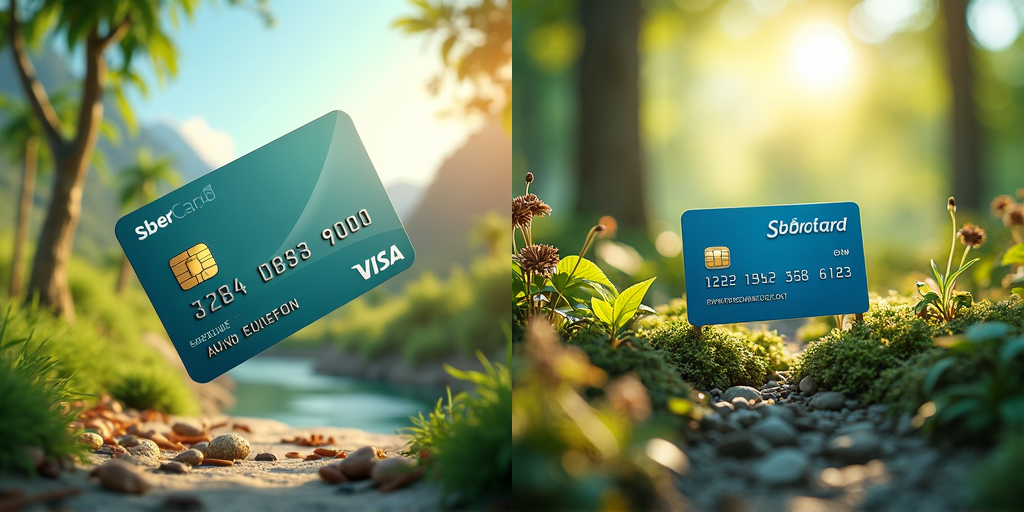

In [6]:
%cd /content/ranger_generation
!pip install -e . --quiet

output_path = "./test_gen/out_qwen_flux.png"

!python3 scripts/demo_qwen_flux.py "{prompt}" \
  --use_qwen \
  -n 2 -W 512 -H 512 -s 30 -g 3.5 \
  --seeds 222,333 \
  -o "{output_path}"

from IPython.display import Image, display
display(Image(output_path))


## use_qwen & use_negative

2025-07-11 07:26:47.756043: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 07:26:47.774118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752218807.796053    8275 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752218807.802728    8275 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-11 07:26:47.824792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

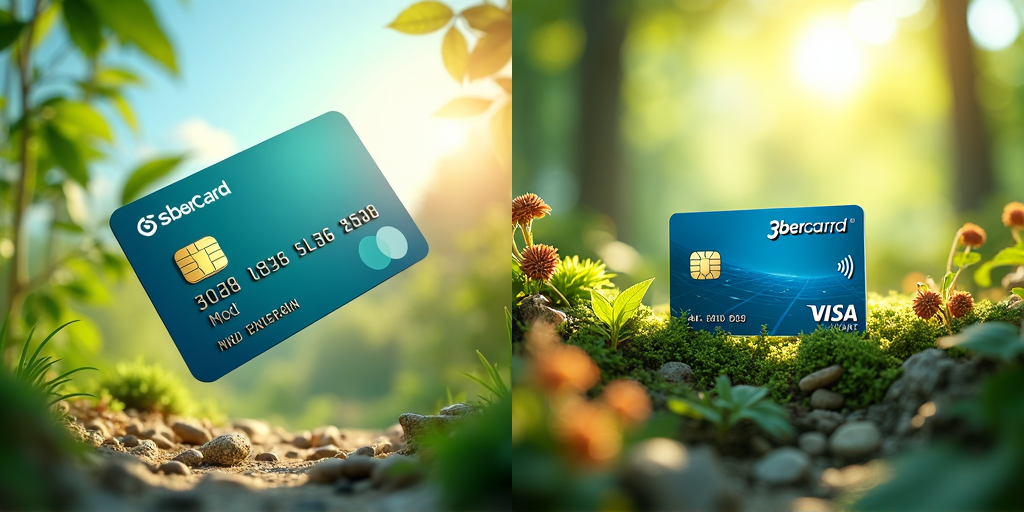

In [7]:
output_path = "./test_gen/out_qwen_flux_with_neg.png"

!python3 scripts/demo_qwen_flux.py "{prompt}" \
  --use_qwen --use_negative \
  -n 2 -W 512 -H 512 -s 30 -g 3.5 \
  --seeds 222,333 \
  -o "{output_path}"

from IPython.display import Image, display
display(Image(output_path))